In [1]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book (1).csv


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
booksdata = pd.read_csv(r'book.csv')


In [3]:
booksdata

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
booksdata.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [5]:
booksdata.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
!pip install apyori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from apyori import apriori
df = booksdata

In [8]:
# Convert the dataset into a list of lists for the Apriori algorithm
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i,j]) for j in range(len(df.columns))])


In [9]:
# Generate rules using the Apriori algorithm
rules = list(apriori(transactions, min_support=0.1, min_confidence=0.5))

In [10]:
# Convert the rules into a pandas dataframe
rules_df = pd.DataFrame(columns=['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'])
for rule in rules:
    antecedent = ', '.join(list(rule.ordered_statistics[0].items_base))
    consequent = ', '.join(list(rule.ordered_statistics[0].items_add))
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence
    lift = rule.ordered_statistics[0].lift
    rules_df = pd.concat([rules_df, pd.DataFrame({'Antecedent': antecedent, 'Consequent': consequent, 'Support': support, 
                                'Confidence': confidence, 'Lift': lift}, index=[0])], ignore_index=True)



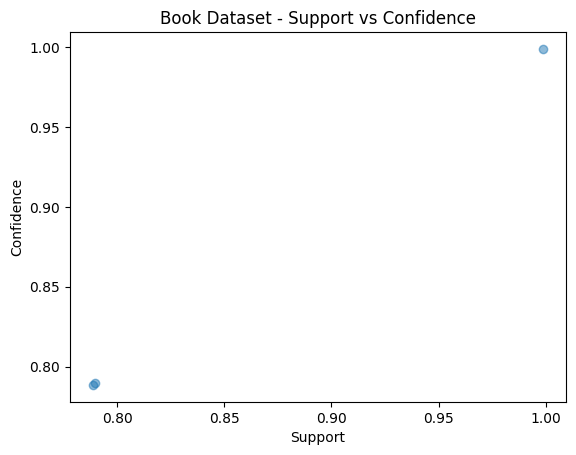

In [11]:
# Create a scatter plot of support vs confidence
plt.scatter(rules_df['Support'], rules_df['Confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Book Dataset - Support vs Confidence')
plt.show()



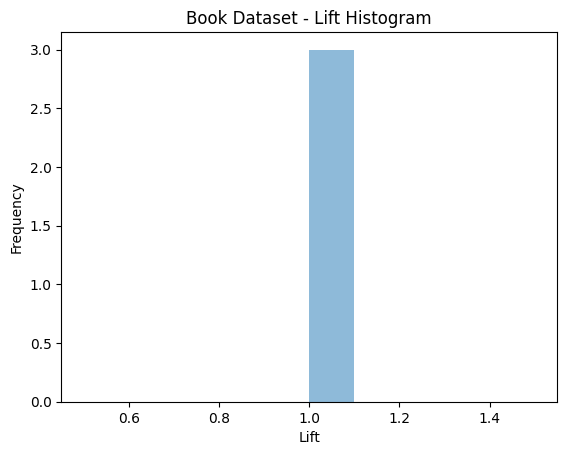

In [12]:
# Create a histogram of lift
plt.hist(rules_df['Lift'], bins=10, alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Book Dataset - Lift Histogram')
plt.show()


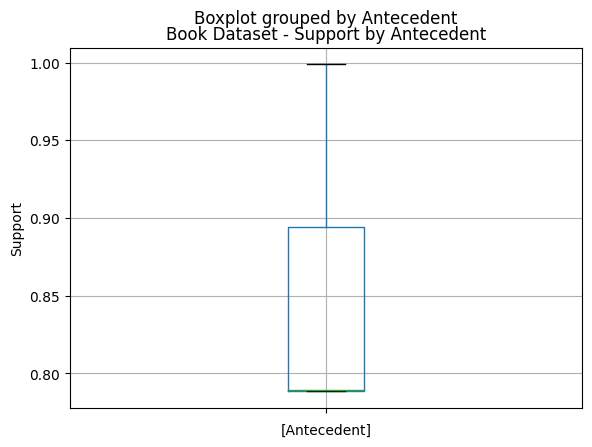

In [13]:
# Create a box plot of support by antecedent
rules_df.boxplot(column=['Support'], by=['Antecedent'], rot=90)
plt.ylabel('Support')
plt.title('Book Dataset - Support by Antecedent')
plt.show()
